### Import

In [2]:
import numpy as np 
import pandas as pd 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from glob import glob
import cv2
import os
from PIL import Image
from keras.preprocessing.image import load_img

### Data 

In [4]:
from google.colab import drive
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/kaggle
#!kaggle datasets download -d misrakahmed/vegetable-image-dataset
#!unzip Final_Mk2.zip #&& rm *.zip
# Setting Training & Test dir paths


Streaming output truncated to the last 5000 lines.
  inflating: Final_Mk2/train/Tomato/0725.jpg  
  inflating: Final_Mk2/train/Tomato/0726.jpg  
  inflating: Final_Mk2/train/Tomato/0727.jpg  
  inflating: Final_Mk2/train/Tomato/0728.jpg  
  inflating: Final_Mk2/train/Tomato/0729.jpg  
  inflating: Final_Mk2/train/Tomato/0730.jpg  
  inflating: Final_Mk2/train/Tomato/0731.jpg  
  inflating: Final_Mk2/train/Tomato/0732.jpg  
  inflating: Final_Mk2/train/Tomato/0733.jpg  
  inflating: Final_Mk2/train/Tomato/0734.jpg  
  inflating: Final_Mk2/train/Tomato/0735.jpg  
  inflating: Final_Mk2/train/Tomato/0736.jpg  
  inflating: Final_Mk2/train/Tomato/0737.jpg  
  inflating: Final_Mk2/train/Tomato/0738.jpg  
  inflating: Final_Mk2/train/Tomato/0739.jpg  
  inflating: Final_Mk2/train/Tomato/0740.jpg  
  inflating: Final_Mk2/train/Tomato/0741.jpg  
  inflating: Final_Mk2/train/Tomato/0742.jpg  
  inflating: Final_Mk2/train/Tomato/0743.jpg  
  inflating: Final_Mk2/train/Tomato/0744.jpg  
  inflati

In [5]:
training_dir = './Final_Mk2/train/'
validation_dir = './Final_Mk2/validation/'
test_dir = './Final_Mk2/test/'

In [6]:
print(len(next(os.walk(validation_dir))[1]))

26


In [7]:
my_list = os.listdir(training_dir)
print(my_list)

['Apple', 'banana', 'Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'custard_apple', 'grape', 'lemon', 'mango', 'onion', 'orange', 'Papaya', 'Pineapple', 'Potato', 'Pumpkin', 'Radish', 'strawberry', 'Tomato', 'watermelon']


In [9]:
%ls

appal.jpg   Final_Mk1.zip  fruits/       TDLDataset/
content/    Final_Mk2/     kaggle.json   vegetable-image-dataset.zip
Final_Mk1/  Final_Mk2.zip  model_saves/


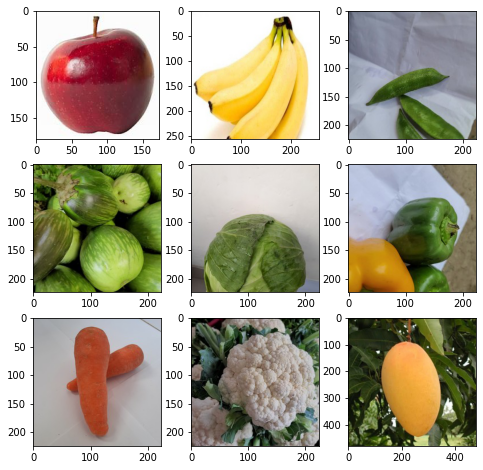

In [10]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(3,3,1)
ax1.imshow(np.array(Image.open("./Final_Mk2/train/Apple/1.jpg")))

ax2 = fig.add_subplot(3,3,2)
ax2.imshow(np.array(Image.open("./Final_Mk2/train/banana/0CNHV8VNNO2K.jpg")))

ax3 = fig.add_subplot(3,3,3)
ax3.imshow(np.array(Image.open("./Final_Mk2/train/Bean/0028.jpg")))

ax4 = fig.add_subplot(3,3,4)
ax4.imshow(np.array(Image.open("./Final_Mk2/train/Brinjal/0002.jpg")))

ax5 = fig.add_subplot(3,3,5)
ax5.imshow(np.array(Image.open("./Final_Mk2/train/Cabbage/0001.jpg")))

ax6 = fig.add_subplot(3,3,6)
ax6.imshow(np.array(Image.open("./Final_Mk2/train/Capsicum/0002.jpg")))

ax7 = fig.add_subplot(3,3,7)
ax7.imshow(np.array(Image.open("./Final_Mk2/train/Carrot/0017.jpg")))

ax8 = fig.add_subplot(3,3,8)
ax8.imshow(np.array(Image.open("./Final_Mk2/train/Cauliflower/0040.jpg")))

ax9 = fig.add_subplot(3,3,9)
ax9.imshow(np.array(Image.open("./Final_Mk2/train/mango/mango_26.jpg")))

### Implementation

In [11]:
vgg = VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [12]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
vgg_layer_list = vgg.layers
print(len(vgg_layer_list))

23


In [14]:
model = Sequential()  # START BUILDING
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
numberOfClass = 26  #BUILDING
# numberOfClass = 36
for layers in model.layers:
    layers.trainable = False
    
model.add(Dense(numberOfClass,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
model_layer_list = model.layers  
print(len(model_layer_list))

22


In [17]:
model.compile(loss="categorical_crossentropy", # FINAL BUILDING
             optimizer="rmsprop",
             metrics=["accuracy"])

train_data = ImageDataGenerator().flow_from_directory(training_dir,target_size=(224,224))

test_data = ImageDataGenerator().flow_from_directory(validation_dir,target_size=(224,224))

Found 22670 images belonging to 26 classes.
Found 4305 images belonging to 26 classes.


In [19]:
from tensorflow import keras
# model = keras.models.load_model("./model_saves/4/")
# keras.models.load_weights("fruits_model.h5")
batch_size=64
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs=10,
                           validation_data=test_data,
                           validation_steps=800//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
25/25 [==============================] - 20s 291ms/step - loss: 2.3062 - accuracy: 0.5425 - val_loss: 1.3455 - val_accuracy: 0.6615
Epoch 2/10
25/25 [==============================] - 7s 293ms/step - loss: 1.0959 - accuracy: 0.7362 - val_loss: 0.9401 - val_accuracy: 0.7708
Epoch 3/10
25/25 [==============================] - 8s 308ms/step - loss: 0.8477 - accuracy: 0.7925 - val_loss: 0.6790 - val_accuracy: 0.8281
Epoch 4/10
25/25 [==============================] - 6s 237ms/step - loss: 0.9301 - accuracy: 0.7650 - val_loss: 0.6440 - val_accuracy: 0.8177
Epoch 5/10
25/25 [==============================] - 6s 238ms/step - loss: 0.7507 - accuracy: 0.8138 - val_loss: 0.6256 - val_accuracy: 0.8516
Epoch 6/10
25/25 [==============================] - 6s 236ms/step - loss: 0.7885 - accuracy: 0.8138 - val_loss: 0.6949 - val_accuracy: 0.8490
Epoch 7/10
25/25 [==============================] - 6s 235ms/step - loss: 0.7090 - accuracy: 0.8188 - val_loss: 0.5279 - val_accuracy: 0.8828
Epoch

In [20]:
model.save("./content/gdrive/MyDrive/Final_Mk2") #save the model

INFO:tensorflow:Assets written to: ./content/gdrive/MyDrive/Final_Mk2/assets


In [24]:
#%cd content/gdrive/MyDrive
#%ls
%cd ..
%ls

/content/gdrive/MyDrive/kaggle
appal.jpg   Final_Mk1.zip  fruits/       TDLDataset/
content/    Final_Mk2/     kaggle.json   vegetable-image-dataset.zip
Final_Mk1/  Final_Mk2.zip  model_saves/


In [25]:
# from keras.models import load_weights
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


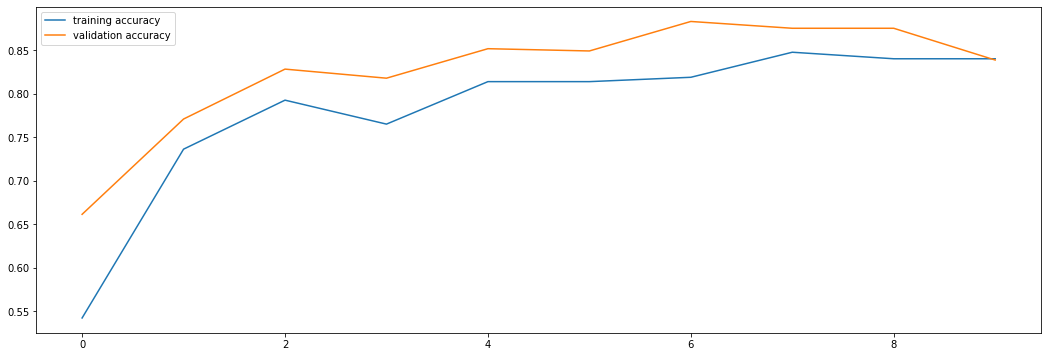

In [26]:
plt.figure(figsize=(18,6))
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

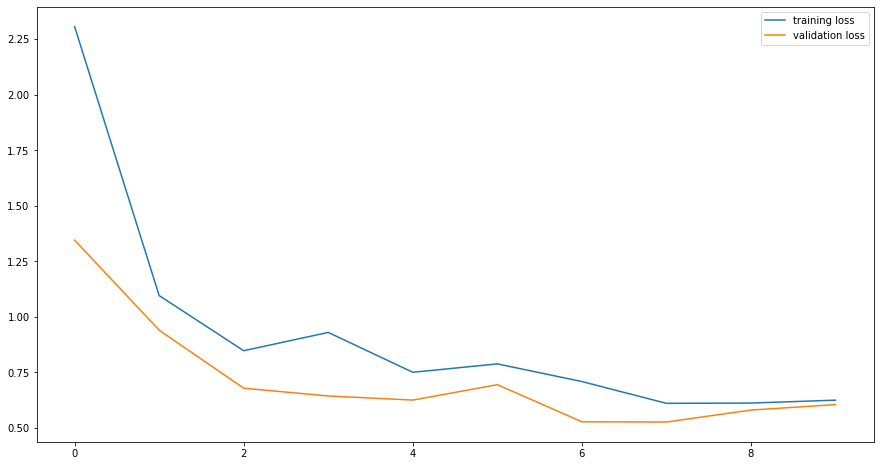

In [27]:
plt.figure(figsize=(15,8))
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

In [28]:
print("Model accuracy is: ",hist.history["accuracy"][-1])
print("Model validation accuracy is: ",hist.history["val_accuracy"][-1])

Model accuracy is:  0.8399999737739563
Model validation accuracy is:  0.8385416865348816


### Prediction

In [29]:
idx_to_name = {x:i for (x,i) in enumerate(train_data.class_indices)}

def predict(img):
    to_predict = np.zeros(shape=train_data[0][0].shape)
    to_predict[0] = img
    
    return idx_to_name[np.argmax(model(to_predict)[0])]

In [ ]:
%cd content/gdrive/MyDrive
%ls

/content/gdrive/MyDrive/kaggle/content/gdrive/MyDrive
model1/


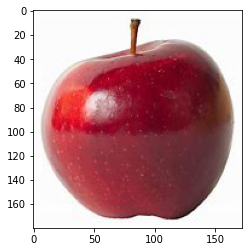

In [30]:
image = plt.imread("./Final_Mk2/train/Apple/1.jpg")
plt.imshow(image)

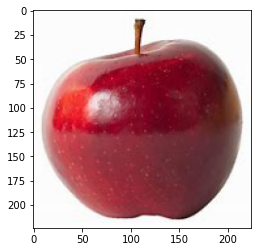

In [31]:
resized = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
plt.imshow(resized) 

In [32]:
predict(resized)

'Apple'

In [33]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

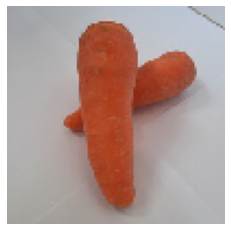

(100, 100, 3)
Number of classes 26


In [37]:
#Setting Training & Test dir paths
train_path = './Final_Mk2/train/'
test_path = './Final_Mk2/test/'
#Displaying the image
img = load_img(train_path + "Carrot/0017.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)
print("Number of classes",number_of_class)

In [38]:
#Creating the model2
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape = x.shape))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())
model2.add(Conv2D(32,(3,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())
model2.add(Conv2D(64,(3,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(1024))
model2.add(Activation("relu"))
model2.add(Dropout(0.5))
model2.add(Dense(number_of_class)) 
model2.add(Activation("softmax"))

#Compiling the model
model2.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model2.summary()
print(x.shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                  

In [39]:
#Specifing epochs & batch size
epochs = 10
batch_size = 64

In [40]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
print(x.shape[:2])

Found 22670 images belonging to 26 classes.
Found 5027 images belonging to 26 classes.
(100, 100)


In [41]:
#Fitting the model
from tensorflow import keras
# model2 = keras.models.load_model("./model_saves/1/")
hist = model2.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 100 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
25/25 [==============================] - 13s 424ms/step - loss: 3.1828 - accuracy: 0.0800 - val_loss: 2.8396 - val_accuracy: 0.1094
Epoch 2/10
25/25 [==============================] - 10s 386ms/step - loss: 2.7739 - accuracy: 0.1656 - val_loss: 2.5702 - val_accuracy: 0.1406
Epoch 3/10
25/25 [==============================] - 10s 384ms/step - loss: 2.6154 - accuracy: 0.2087 - val_loss: 2.5560 - val_accuracy: 0.2031
Epoch 4/10
25/25 [==============================] - 10s 383ms/step - loss: 2.4604 - accuracy: 0.2488 - val_loss: 2.5242 - val_accuracy: 0.1875
Epoch 5/10
25/25 [==============================] - 9s 370ms/step - loss: 2.3139 - accuracy: 0.2975 - val_loss: 2.2999 - val_accuracy: 0.2812
Epoch 6/10
25/25 [==============================] - 10s 386ms/step - loss: 2.2091 - accuracy: 0.3269 - val_loss: 2.0020 - val_accuracy: 0.4844
Epoch 7/10
25/25 [==============================] - 9s 374ms/step - loss: 2.1064 - accuracy: 0.3756 - val_loss: 1.8057 - val_accuracy: 0.5000
E

In [42]:
model2.save('./content/gdrive/MyDrive/VGG_vanilla')

INFO:tensorflow:Assets written to: ./content/gdrive/MyDrive/VGG_vanilla/assets


In [43]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [44]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [55]:
for layer in vgg.layers:
  layer.trainable = False
folders = glob('./Final_Mk2/train/*')
print(len(folders))

26


In [56]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [57]:
from keras import optimizers

adam = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [58]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [59]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [60]:
train_set = train_datagen.flow_from_directory(training_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22670 images belonging to 26 classes.


In [61]:
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5027 images belonging to 26 classes.


In [62]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,
    verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 1: val_loss improved from inf to 4.10671, saving model to mymodel.h5
5/5 - 20s - loss: 3.3794 - accuracy: 0.0688 - val_loss: 4.1067 - val_accuracy: 0.0762 - 20s/epoch - 4s/step
Epoch 2/10

Epoch 2: val_loss improved from 4.10671 to 3.17371, saving model to mymodel.h5
5/5 - 19s - loss: 3.5699 - accuracy: 0.1625 - val_loss: 3.1737 - val_accuracy: 0.2090 - 19s/epoch - 4s/step
Epoch 3/10

Epoch 3: val_loss improved from 3.17371 to 2.12405, saving model to mymodel.h5
5/5 - 18s - loss: 2.6362 - accuracy: 0.2562 - val_loss: 2.1240 - val_accuracy: 0.3730 - 18s/epoch - 4s/step
Epoch 4/10

Epoch 4: val_loss improved from 2.12405 to 1.34727, saving model to mymodel.h5
5/5 - 18s - loss: 1.6882 - accuracy: 0.4625 - val_loss: 1.3473 - val_accuracy: 0.4629 - 18s/epoch - 4s/step
Epoch 5/10

Epoch 5: val_loss improved from 1.34727 to 0.95406, saving model to mymodel.h5
5/5 - 18s - loss: 1.3912 - accuracy: 0.5063 - val_loss: 0.9541 - val_accuracy: 0.5889 - 18s/epoch - 4s/step
Epoch 6/1

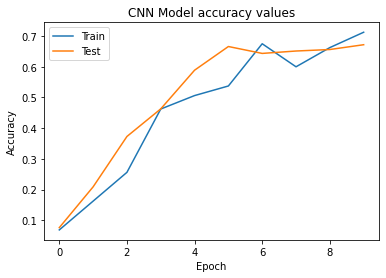

In [63]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [64]:
model_history.history['accuracy']

[0.06875000149011612,
 0.16249999403953552,
 0.2562499940395355,
 0.4625000059604645,
 0.5062500238418579,
 0.5375000238418579,
 0.675000011920929,
 0.6000000238418579,
 0.6625000238418579,
 0.7124999761581421]